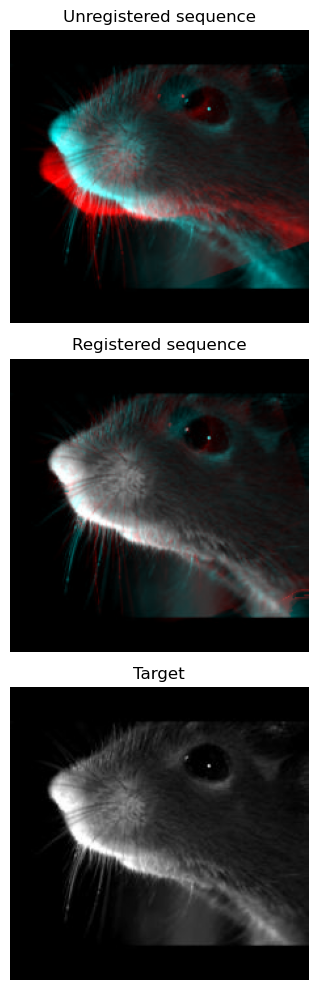

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from skimage import io, color


### Code for registration of single test image onto single target image


# --- Load the sequence
image1 = io.imread('Test_img9160_rotate_rescale_augmented.jpg')
image0 = io.imread('Target_img9160_pad_rescale_augmented.jpg')

# --- Convert the images to gray level: color is not supported.
image0 = rgb2gray(image0)
image1 = rgb2gray(image1)

# --- Compute the optical flow
v, u = optical_flow_tvl1(image0, image1)

# --- Use the estimated optical flow for registration

nr, nc = image0.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')

image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]), mode='edge')

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = image1
seq_im[..., 1] = image0
seq_im[..., 2] = image0

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = image0
reg_im[..., 2] = image0

# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = image0
target_im[..., 1] = image0
target_im[..., 2] = image0

# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()

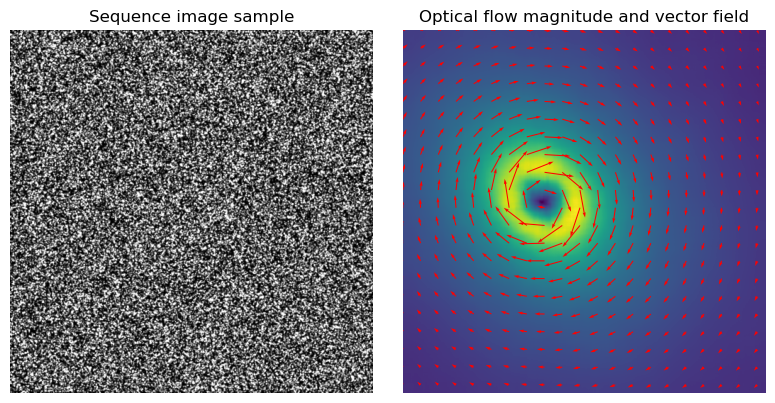

In [2]:
image0, image1 = vortex()

# --- Compute the optical flow
v, u = optical_flow_ilk(image0, image1, radius=15)

# --- Compute flow magnitude
norm = np.sqrt(u**2 + v**2)

# --- Display
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

# --- Sequence image sample

ax0.imshow(image0, cmap='gray')
ax0.set_title("Sequence image sample")
ax0.set_axis_off()

# --- Quiver plot arguments

nvec = 20  # Number of vectors to be displayed along each image dimension
nl, nc = image0.shape
step = max(nl // nvec, nc // nvec)

y, x = np.mgrid[:nl:step, :nc:step]
u_ = u[::step, ::step]
v_ = v[::step, ::step]

ax1.imshow(norm)
ax1.quiver(x, y, u_, v_, color='r', units='dots', angles='xy', scale_units='xy', lw=3)
ax1.set_title("Optical flow magnitude and vector field")
ax1.set_axis_off()
fig.tight_layout()

plt.show()

### Code for registration of single test image onto single target image

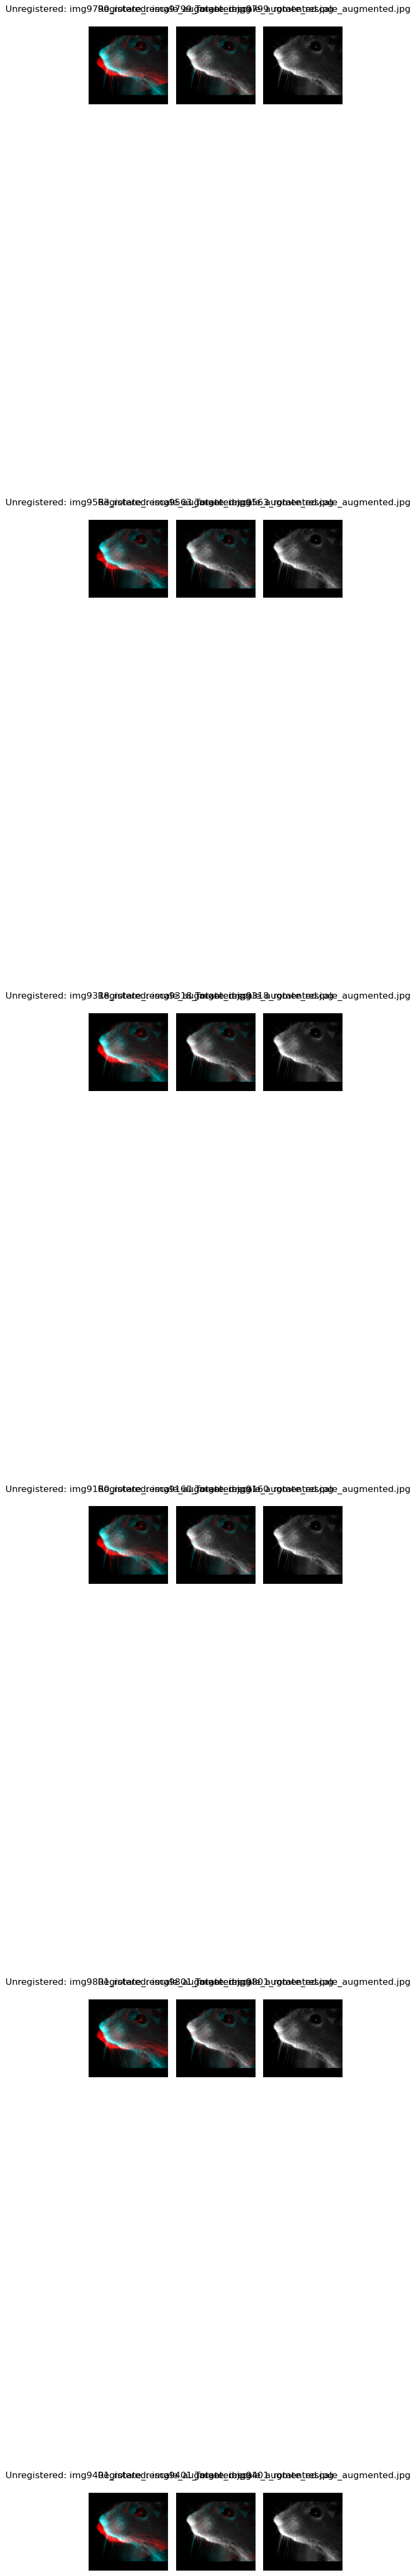

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1
from skimage import io
import os

### Code for registration of sequence of images onto single target image

# --- Load the target image
image0 = io.imread('Target_img9160_pad_rescale_augmented.jpg')
image0 = rgb2gray(image0)

# --- Path to the folder containing images
folder_path = 'Images'
images = os.listdir(folder_path)

fig, axs = plt.subplots(len(images), 3, figsize=(5, 10 * len(images)))

for i, img_name in enumerate(images):
    image_path = os.path.join(folder_path, img_name)
    image1 = io.imread(image_path)
    image1 = rgb2gray(image1)

    # --- Compute the optical flow
    v, u = optical_flow_tvl1(image0, image1)

    # --- Use the estimated optical flow for registration
    nr, nc = image0.shape
    row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
    image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]), mode='edge')

    # build an RGB image with the unregistered sequence
    seq_im = np.zeros((nr, nc, 3))
    seq_im[..., 0] = image1
    seq_im[..., 1] = image0
    seq_im[..., 2] = image0

    # build an RGB image with the registered sequence
    reg_im = np.zeros((nr, nc, 3))
    reg_im[..., 0] = image1_warp
    reg_im[..., 1] = image0
    reg_im[..., 2] = image0

    # Display the images
    axs[i, 0].imshow(seq_im)
    axs[i, 0].set_title(f"Unregistered: {img_name}", pad=20)
    axs[i, 0].set_axis_off()

    axs[i, 1].imshow(reg_im)
    axs[i, 1].set_title(f"Registered: {img_name}", pad=20)
    axs[i, 1].set_axis_off()

    axs[i, 2].imshow(image0, cmap='gray')
    axs[i, 2].set_title(f"Target: {img_name}", pad=20)
    axs[i, 2].set_axis_off()

fig.tight_layout()
plt.show()
